# Predicting Bike Rentals

In this project we'll be taking a look at bike rental information from Washington D.C. Many American cities have communal bike sharing stations where bikes can be rented by the hour or by the day. We will try to predict the number of bike rentals in a given hour.

We'll begin by doing some exploratory data analysis.

In [1]:
import pandas as pd
bike_rentals = pd.read_csv('bike_rental_hour.csv')

bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [2]:
bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


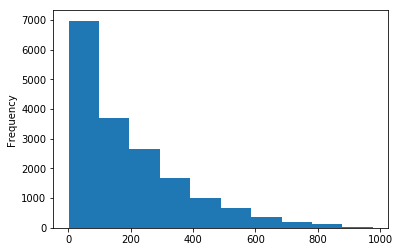

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
bike_rentals['cnt'].plot(kind = 'hist')
plt.show()

In [4]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Reading such a table can be quite cubersome. Instead, we'll visualize the correlations using the seaborn package to identify which factors might have especially strong relations to the number of bikes rented in a given hour.

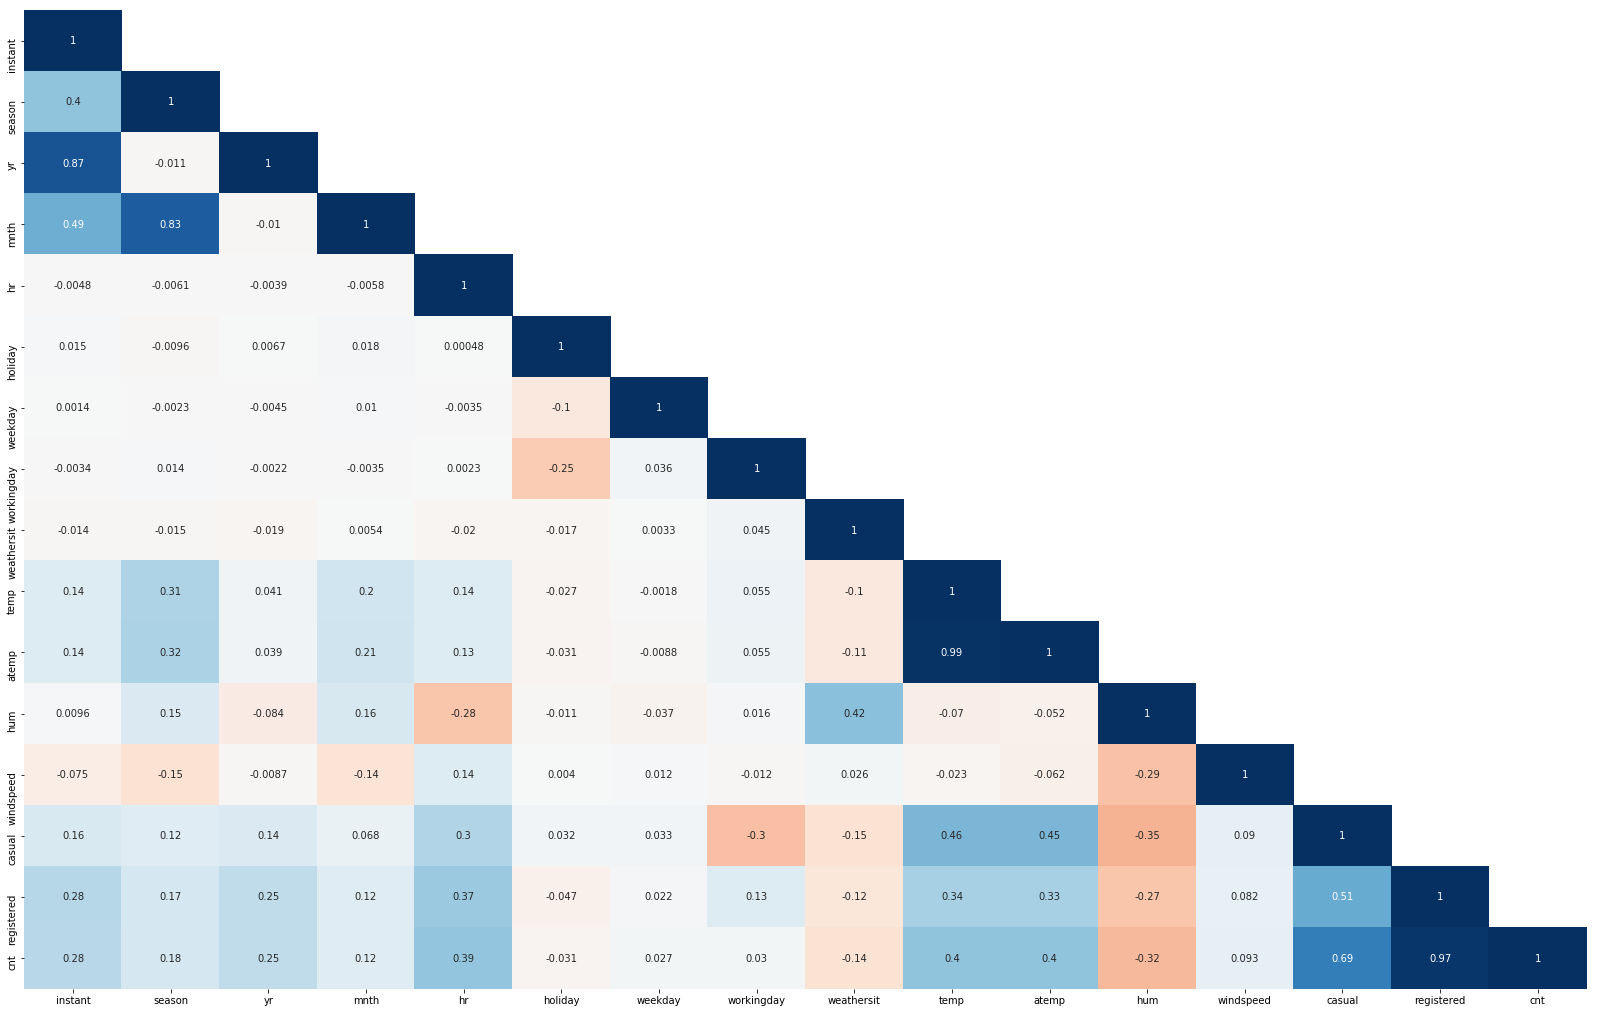

In [5]:
import seaborn as sns
import numpy as np
corrs = bike_rentals.corr()
mask = np.triu(np.ones_like(corrs), k=1)
plt.figure(figsize=(28,18))
ax = sns.heatmap(corrs, vmin=-1, vmax=1, cbar=False,
                cmap='RdBu', mask=mask, annot=True)

To do a bit more data processing, we'll group the hours into 4 bins corresponding to 6 hour windows throughout the day.

In [6]:
# Assign the times of days to a subgroup of hours
def assign_label(hour):
    if hour >= 6 and hour < 12:
        return 1
    elif hour >= 12 and hour < 18:
        return 2
    elif hour >= 18 and hour < 24:
        return 3
    else:
        return 4

bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

bike_rentals.head(10)
    

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


### Error Metric

The error metric we'll be using is root mean squared error. We select root mean squared error since we're working on a continuous output.

In [7]:
import math
threshold = math.floor(0.8*bike_rentals.shape[0]) 
shuffled = bike_rentals.sample(frac = 1)
train = shuffled[0:threshold]
test = shuffled[threshold:]

# Alternate way to select
# bike_rentals.index.isin(train.index)
# bike_rentals.loc[~bike_rentals.index.isin(train.index)]

### Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'time_label']
target = ['cnt']
# Might want to drop one of temp and atemp

lr = LinearRegression()
lr.fit(train[features], train[target])
predictions = lr.predict(test[features])
rmse = (mean_squared_error(test[target], predictions))**(1/2)

rmse
            

138.71013239522918

The error is rather large, with the root mean squared error at 140.82 it implies that our predictions are going to be pretty inaccurate. One explanation for this could be that the data is in fact getting skewed by a low number of extreme outliers. These outliers can significantly pull up the average, creating a large error in the RMSE.

### Decision Tree Model

In [9]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(min_samples_leaf = 5)
dt.fit(train[features], train[target])
predictions = dt.predict(test[features])
rmse_dt = (mean_squared_error(test[target], predictions))**(1/2)

rmse_dt

125.50813482953035

Using a decision tree regressor improves the RMSE by a substantial amount. Since we know that decision trees tend to suffer from overfitting, we can use a random forest ensemble to reduce this effect and thus potentially achieve better results on the test set.

### Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_leaf = 5)
rf.fit(train[features], train[target])
predictions = rf.predict(test[features])
rmse_rf = (mean_squared_error(test[target], predictions))**(1/2)

rmse_rf

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


112.35450312660639

Using a random forest managed to mitigate some of the overfitting and thus resulted in an even lower RMSE than the decision tree regressor. 

### Conclusion

In this project we worked on the problem of predicting hourly bike rentals using various regression models. We found that ensemble methods, such as the random forest ensemble, can help mitigate some of the shortcomings of simpler models.